### Student Information
Name:

Student ID:

GitHub ID:

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [68]:
### Begin Assignment Here


In [69]:
# 環境設定 Environment setup (Phase 1)
import pandas as pd
import numpy as np
from pathlib import Path

import nltk
nltk.download('punkt', quiet=True)

from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import matplotlib.pyplot as plt
import math

RANDOM_STATE = 42
pd.set_option('display.max_colwidth', 120)


In [70]:
# 讀取資料（相對路徑） Load dataset (relative path)
data_path = Path('newdataset') / 'Reddit-stock-sentiment.csv'
Data_path = data_path  # alias (original variable name)
df = pd.read_csv(data_path, encoding='utf-8')
df.head()


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,"Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history",Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and ...,Btankersly66,https://apnews.com/article/trump-truth-social-djt-tesla-musk-tariffs-pause-fccfa6b06c8f1ec0cd7844641ca52669,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comments/165kllm/who_knows_more_vmar/,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has ac...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', 'Marine', 'Main', 'Systems', 'Vision Marine Technologies Inc.', 'Visio...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping to call Trump quickly.,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/trump-xi-china-tariffs/index.html,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


### Exercise 1

In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [71]:
# 練習 1：印出前三筆文字資料 Exercise 1: print first three text samples
for i in range(3):
    print(f'(for example {i+1})')
    print('label:', df.loc[i, 'label'])
    print(df.loc[i, 'text'])
    print()


(for example 1)
label: -1.0
Calls on retards

(for example 2)
label: 0.0
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.

(for example 3)
label: 0.0
Seeing lots of red in the ticker.



### Exercise 2 


In [72]:
# 練習 2：pandas 查詢練習 Exercise 2: pandas querying practice

# 建立 Phase 1 的清理後資料表 Create a cleaned working dataframe for Phase 1
df_work = df[['datetime', 'subreddit', 'title', 'text', 'label', 'polarity', 'subjectivity']].copy()
df_work['datetime'] = pd.to_datetime(df_work['datetime'], errors='coerce')
df_work['label'] = pd.to_numeric(df_work['label'], errors='coerce')
df_work['text'] = df_work['text'].fillna('').astype(str)
df_work = df_work[df_work['text'].str.strip().ne('')].dropna(subset=['label']).reset_index(drop=True)

print('shape:', df_work.shape)
print('label distribution:')
display(df_work['label'].value_counts(dropna=False))

# 使用 iloc：依位置取值 iloc: select by position
display(df_work.iloc[:3])

# 使用 loc：用條件過濾 loc: boolean filtering
display(df_work.loc[df_work['label'] == 1.0, ['label', 'subreddit', 'text']].head(3))

# query?? SQL ?? query: SQL-like filtering
display(df_work.query('label == -1.0')[['label', 'subreddit', 'text']].head(3))

# 文字包含搜尋 string contains
display(df_work[df_work['text'].str.contains('stock', case=False, na=False)].head(3))

# 隨機抽樣 sample
display(df_work.sample(3, random_state=RANDOM_STATE))


shape: (847, 7)
label distribution:


label
 0.0    423
-1.0    315
 1.0    109
Name: count, dtype: int64

,datetime,subreddit,title,text,label,polarity,subjectivity
0,2025-04-11 17:29:56,wallstreetbets,Retardation is on the menu boys! WSB is so back,Calls on retards,-1.0,-0.900000,1.000000
1,2025-04-12 01:12:19,wallstreetbets,"Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history",Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk...,0.0,0.083333,0.177778
2,2025-04-10 15:09:41,StockMarket,How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and ...,Seeing lots of red in the ticker.,0.0,0.000000,0.000000


,label,subreddit,text
3,1.0,stockstobuytoday,Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has ac...
8,1.0,stocks,Am I the only one seeing the cup & handle breakout here? 52 week high? Third Green Day? The pivot was on Thursday. P...
9,1.0,stockstobuytoday,HLGN is $10. Hurry and catch it now before it shoots to the moon!


,label,subreddit,text
0,-1.0,wallstreetbets,Calls on retards
4,-1.0,StockMarket,He didn’t say thank you.
6,-1.0,stocks,Trump will respond to china increasing their tariffs. Trump is looking to fire Jerome Powell. Earnings reporting is ...


,datetime,subreddit,title,text,label,polarity,subjectivity
48,2025-04-02 13:00:42,stockstobuytoday,Earnings for current week,\r\n\r\n [MarketWatch: Stock Market News - Financial News - Earmings Stonkvest (stockbuyvest.com)]() \r\n\r\n\#cata...,0.0,0.000000,0.000000
63,2025-03-01 10:00:42,stocks,Rate My Portfolio - r/Stocks Quarterly Thread March 2025,"Please use this thread to discuss your portfolio, learn of other stock tickers & portfolios like [Warren Buffet's](/...",0.0,0.176667,0.368030
72,2025-04-04 06:25:04,stockstobuytoday,Spending first $250 tmmw on stocks,"A lot of stocks are down right now, and I'm thinking of spending 250 on the below tmmw. Thoughts (some are partial c...",0.0,0.005102,0.347959


,datetime,subreddit,title,text,label,polarity,subjectivity
457,2025-04-11 15:42:58,StockMarket,Trump: We Are Doing Really Well On Our Tariff Policy.,"""We"" who?",0.0,0.0,0.00
342,2025-04-12 03:04:05,wallstreetbets,"Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history",Chicken jockey,0.0,-0.6,0.95
280,2025-04-10 14:40:26,StockMarket,How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and ...,Not great Bob,-1.0,0.8,0.75


### Exercise 3

In [73]:

# 目標：抓特定 subreddit 的資料，每 10 筆取 1 筆，只顯示前 5 筆
# Goal: filter one subreddit, take every 10th row, show first 5

target_subreddit = "StockMarket"  # 你也可以改成 "wallstreetbets" 等
df_sub = df_work.loc[df_work["subreddit"] == target_subreddit, ["datetime", "subreddit", "label", "text"]].reset_index(drop=True)

# every 10th record -> 0,10,20,... then head(5)
display(df_sub.iloc[::10].head(5))


,datetime,subreddit,label,text
0,2025-04-10 15:09:41,StockMarket,0.0,Seeing lots of red in the ticker.
10,2025-04-11 16:11:48,StockMarket,-1.0,Comedy gold :))
20,2025-04-11 15:15:20,StockMarket,0.0,I can’t take four years of lying. Help!
30,2025-04-11 10:04:54,StockMarket,0.0,\r\nAn evil man will burn his own nation to the ground to rule over the ashes. Sun Tzu
40,2025-04-11 14:46:24,StockMarket,-1.0,He reached this level only because of his inheritance. He consistently ruins everything he touches. The only reason ...


### EX4

In [74]:

# 目標:按列(row/record)算每筆缺值數
# Goal: count missing values per record (row) instead of per column


# 每筆缺值數 / missing count per row
missing_per_row = df_work.isna().sum(axis=1)

# 把結果加回表，方便觀察 / attach to dataframe
df_work["missing_count"] = missing_per_row

print("missing_count value counts:")
display(df_work["missing_count"].value_counts().sort_index())

# 顯示缺值最多的前 5 筆 / show top 5 rows with most missing
display(df_work.sort_values("missing_count", ascending=False).head(5)[
    ["datetime", "subreddit", "label", "missing_count", "text"]
])


missing_count value counts:


missing_count
0    847
Name: count, dtype: int64

,datetime,subreddit,label,missing_count,text
846,2025-04-12 03:09:06,wallstreetbets,0.0,0,![img](emote|t5_2th52|31224)
0,2025-04-11 17:29:56,wallstreetbets,-1.0,0,Calls on retards
1,2025-04-12 01:12:19,wallstreetbets,0.0,0,Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk...
2,2025-04-10 15:09:41,StockMarket,0.0,0,Seeing lots of red in the ticker.
3,2023-08-30 17:12:55,stockstobuytoday,1.0,0,Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has ac...


### 4.2 重複值處理 Dealing with Duplicate Data

In [75]:

# 目標：檢查重複列並去除（以 text 為主，避免同一篇內容重複）
# Goal: check and remove duplicates (based on text to avoid duplicated content)

print("Before:", df_work.shape)

# 1) 檢查整列重複 / check full-row duplicates
full_dup_count = df_work.duplicated().sum()
print("Full-row duplicates:", full_dup_count)

# 2) 檢查 text 重複 / check duplicates by text
text_dup_count = df_work.duplicated(subset=["text"]).sum()
print("Text duplicates:", text_dup_count)

# 3) 去除 text 重複（保留第一筆）/ drop duplicates by text (keep first)
df_work = df_work.drop_duplicates(subset=["text"], keep="first").reset_index(drop=True)

print("After:", df_work.shape)


Before: (847, 8)
Full-row duplicates: 0
Text duplicates: 23
After: (824, 8)


### 5.1

抽樣 200 筆 Sampling 200 records


In [78]:
n =200
df_sample = df_work.sample(n=n, random_state=RANDOM_STATE).reset_index(drop=True)
sample = df_work.sample(n=n, random_state=RANDOM_STATE).reset_index(drop=True)
print(df_work.shape, df_sample.shape)


(824, 8) (200, 8)



### 抽樣分佈比較subredditCompare distribution 

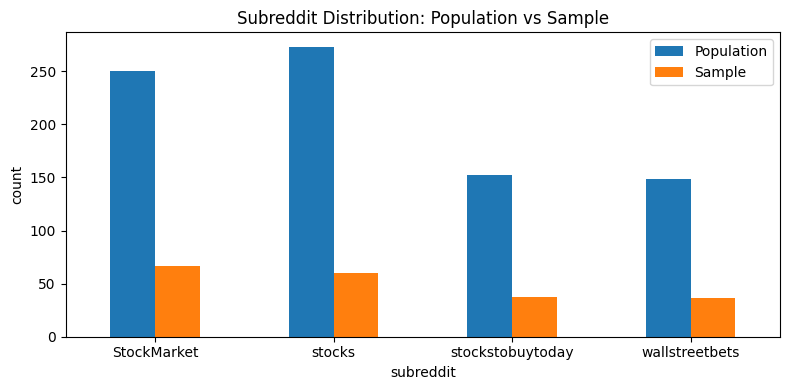

In [ ]:
import matplotlib.pyplot as plt


population_count = df_work["subreddit"].value_counts()
sample_count = df_sample["subreddit"].value_counts()

count_compare = pd.DataFrame({
    "Population": population_count,
    "Sample": sample_count
}).fillna(0)

ax = count_compare.plot(kind="bar", figsize=(8,4), rot=0)
ax.set_title("Subreddit Distribution: Population vs Sample")
ax.set_xlabel("subreddit")
ax.set_ylabel("count")
plt.tight_layout()
plt.show()

Feature Creation

In [82]:
import nltk
nltk.download("punkt", quiet=True)

# HW 5.2：建立 unigrams 欄位（對應 Master 5.2）
df_work["unigrams"] = df_work["text"].fillna("").astype(str).apply(nltk.word_tokenize)

display(df_work.loc[:3, ["text", "unigrams"]])
print(list(df_work.loc[0:0, "unigrams"]))


,text,unigrams
0,Calls on retards,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk...,"[Stunt, as, in, like, why, did, they, even, make, a, big, deal, about, starting, it, in, the, first, place, ?, No, c..."
2,Seeing lots of red in the ticker.,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has ac...,"[Vision, Marine, Technologies, Inc., is, rewriting, the, watercraft, rulebook, ., Their, collaboration, with, Shaun,..."


[['Calls', 'on', 'retards']]


##　5.3 Feature subset selection

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer：學 vocabulary 並產生文件-詞矩陣
# Goal: learn vocabulary and return document-term matrix
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df_work["text"].fillna("").astype(str))

print(X_counts[0])  # 第一筆文件的稀疏向量表示



  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1


# Phase 2

In [ ]:
### Begin Assignment Here